In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.read_csv("Superstore.csv", encoding="latin-1")
print(df.shape)
df.head()

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [153]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [154]:
# 2. Tarih sütunlarını datetime tipine dönüştürme
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [156]:
# 3. Sipariş Yılı ve Sevkiyat Süresi sütunlarını ekleme
df['Order Year'] = df['Order Date'].dt.year
df['Shipment_Duration_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [158]:
# İlk satırları ve temel istatistikleri gösterme
print("--- Veri Seti Bilgisi ---")
print(df.info())
print("\n--- Sayısal Sütunlar için Betimleyici İstatistikler ---")
print(df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipment_Duration_Days']].describe().T)

--- Veri Seti Bilgisi ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Row ID                  9994 non-null   int64         
 1   Order ID                9994 non-null   object        
 2   Order Date              9994 non-null   datetime64[ns]
 3   Ship Date               9994 non-null   datetime64[ns]
 4   Ship Mode               9994 non-null   object        
 5   Customer ID             9994 non-null   object        
 6   Customer Name           9994 non-null   object        
 7   Segment                 9994 non-null   object        
 8   Country                 9994 non-null   object        
 9   City                    9994 non-null   object        
 10  State                   9994 non-null   object        
 11  Postal Code             9994 non-null   int64         
 12  Region                

In [159]:
# --- Adım 3: Keşifçi Veri Analizi (EDA) - Zamana Dayalı Trendler ---

# Yıllık Satış ve Kâr performansını toplama
yearly_performance = df.groupby('Order Year').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

In [160]:
# Yıllık Performansın Görselleştirilmesi
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

C:\Users\VOLKAN\AppData\Local\Temp\ipykernel_10936\3208907185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Year', y='Total_Sales', data=yearly_performance, palette='viridis')


([0, 1, 2, 3],
 [Text(0, 0, '2014'),
  Text(1, 0, '2015'),
  Text(2, 0, '2016'),
  Text(3, 0, '2017')])

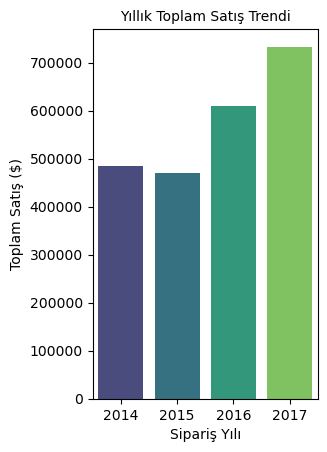

In [161]:
# Satış Grafiği
plt.subplot(1, 2, 1)
sns.barplot(x='Order Year', y='Total_Sales', data=yearly_performance, palette='viridis')
plt.title('Yıllık Toplam Satış Trendi', fontsize=10)
plt.xlabel('Sipariş Yılı')
plt.ylabel('Toplam Satış ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)


Grafik Kaydedildi: yearly_performance_trend.png


C:\Users\VOLKAN\AppData\Local\Temp\ipykernel_10936\454861171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Year', y='Total_Profit', data=yearly_performance, palette='magma')


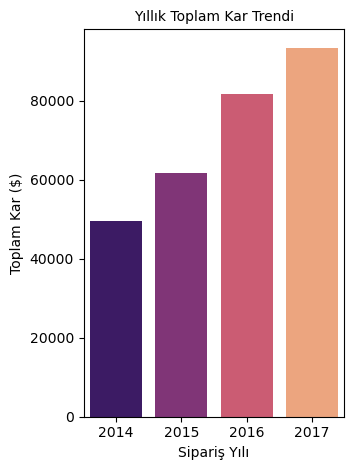

In [162]:
# Kâr Grafiği
plt.subplot(1, 2, 2)
sns.barplot(x='Order Year', y='Total_Profit', data=yearly_performance, palette='magma')
plt.title('Yıllık Toplam Kar Trendi', fontsize=10)
plt.xlabel('Sipariş Yılı')
plt.ylabel('Toplam Kar ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('yearly_performance_trend.png')
print("\nGrafik Kaydedildi: yearly_performance_trend.png")

In [163]:
# --- Adım 4: Kategorik Performans Analizi ---

# Ana Kategoriye göre Satış ve Kâr performansı
category_performance = df.groupby('Category').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).sort_values(by='Total_Sales', ascending=False).reset_index()

In [164]:
# Alt Kategoriye göre Kâr performansı (Kârlılığa göre sıralanmış)
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).reset_index()

In [165]:
# Kategori Performansının Görselleştirilmesi
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

C:\Users\VOLKAN\AppData\Local\Temp\ipykernel_10936\595210867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Sales', y='Category', data=category_performance, palette='viridis')


Text(0, 0.5, 'Kategori')

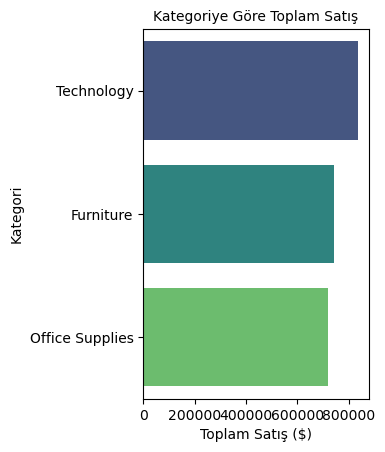

In [166]:
# Kategori Satış Grafiği
plt.subplot(1, 2, 1)
sns.barplot(x='Total_Sales', y='Category', data=category_performance, palette='viridis')
plt.title('Kategoriye Göre Toplam Satış', fontsize=10)
plt.xlabel('Toplam Satış ($)')
plt.ylabel('Kategori')

C:\Users\VOLKAN\AppData\Local\Temp\ipykernel_10936\1954756488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Profit', y='Category', data=category_performance, palette='magma')


Grafik Kaydedildi: category_performance.png


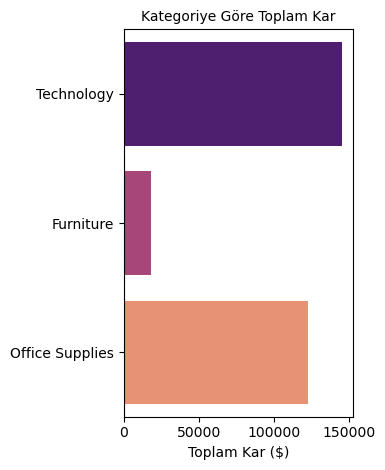

In [167]:
# Kategori Kâr Grafiği
plt.subplot(1, 2, 2)
sns.barplot(x='Total_Profit', y='Category', data=category_performance, palette='magma')
plt.title('Kategoriye Göre Toplam Kar', fontsize=10)
plt.xlabel('Toplam Kar ($)')
plt.ylabel('')
plt.axvline(0, color='red', linestyle='--')

plt.tight_layout()
plt.savefig('category_performance.png')
print("Grafik Kaydedildi: category_performance.png")


C:\Users\VOLKAN\AppData\Local\Temp\ipykernel_10936\538089155.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Sub-Category', data=subcategory_profit, palette='coolwarm')


Grafik Kaydedildi: subcategory_profit.png


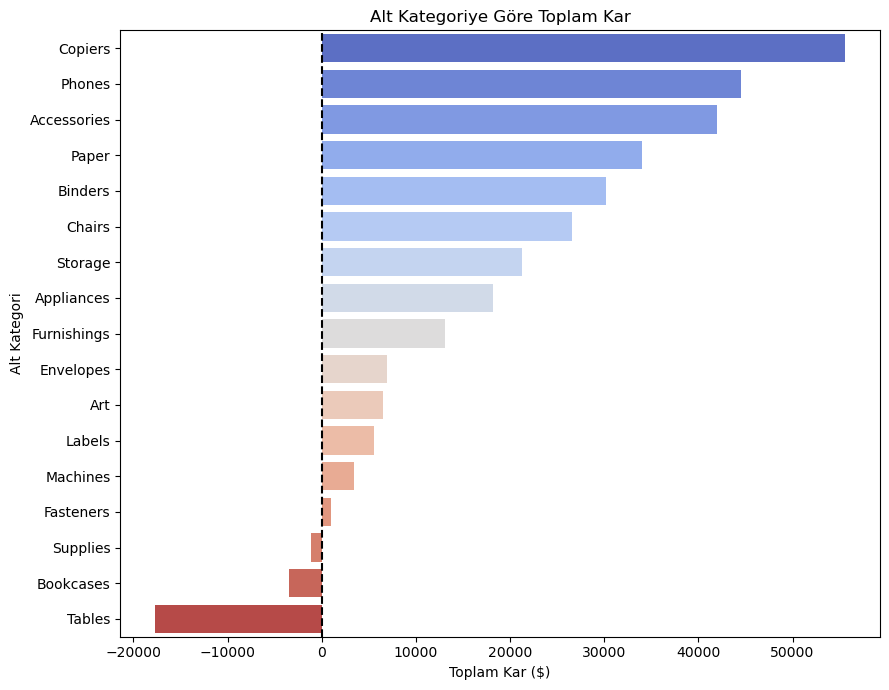

In [179]:
# Alt Kategori Kârının Görselleştirilmesi
plt.figure(figsize=(9, 7))
sns.barplot(x='Profit', y='Sub-Category', data=subcategory_profit, palette='coolwarm')
plt.title('Alt Kategoriye Göre Toplam Kar', fontsize=12)
plt.xlabel('Toplam Kar ($)')
plt.ylabel('Alt Kategori')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.savefig('subcategory_profit.png')
print("Grafik Kaydedildi: subcategory_profit.png")

In [180]:
# --- Adım 5: Coğrafi (Bölgesel) Performans Analizi ---

# Bölgesel Satış ve Kâr performansı
region_performance = df.groupby('Region').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).sort_values(by='Total_Sales', ascending=False).reset_index()

In [183]:
# Bölgesel Performansın Görselleştirilmesi
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

C:\Users\VOLKAN\AppData\Local\Temp\ipykernel_10936\321207067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Sales', y='Region', data=region_performance, palette='viridis')


Text(0, 0.5, 'Bölge')

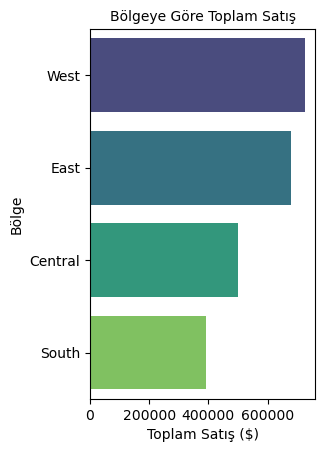

In [185]:
# Bölge Satış Grafiği
plt.subplot(1, 2, 1)
sns.barplot(x='Total_Sales', y='Region', data=region_performance, palette='viridis')
plt.title('Bölgeye Göre Toplam Satış', fontsize=10)
plt.xlabel('Toplam Satış ($)')
plt.ylabel('Bölge')

Grafik Kaydedildi: region_performance.png


C:\Users\VOLKAN\AppData\Local\Temp\ipykernel_10936\1418970763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Profit', y='Region', data=region_performance, palette='magma')


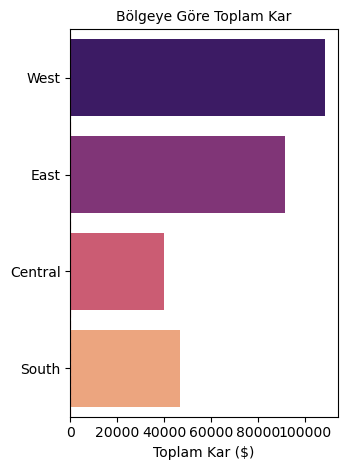

In [187]:
# Bölge Kâr Grafiği
plt.subplot(1, 2, 2)
sns.barplot(x='Total_Profit', y='Region', data=region_performance, palette='magma')
plt.title('Bölgeye Göre Toplam Kar', fontsize=10)
plt.xlabel('Toplam Kar ($)')
plt.ylabel('')
plt.axvline(0, color='red', linestyle='--')

plt.tight_layout()
plt.savefig('region_performance.png')
print("Grafik Kaydedildi: region_performance.png")

C:\Users\VOLKAN\AppData\Local\Temp\ipykernel_10936\1897724128.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount', y='Profit', data=discount_profit, palette='coolwarm')


Grafik Kaydedildi: discount_profit_analysis.png


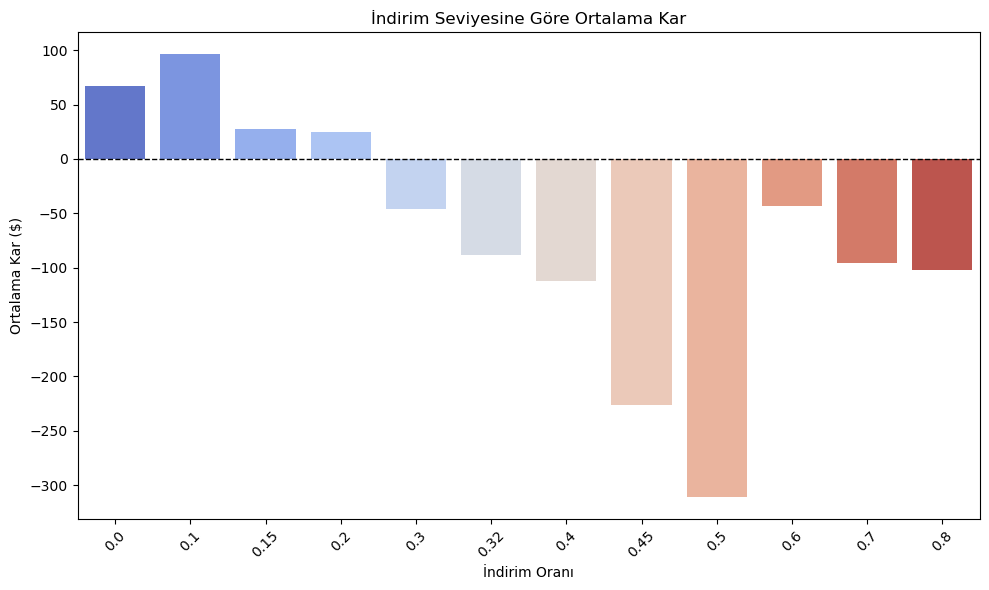

In [189]:
# --- Adım 6: İndirim ve Kâr İlişkisi Analizi ---

# İndirim seviyesine göre ortalama kârı hesaplama
discount_profit = df.groupby('Discount')['Profit'].mean().reset_index()

# İndirim ve Kâr İlişkisinin Görselleştirilmesi
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount', y='Profit', data=discount_profit, palette='coolwarm')
plt.title('İndirim Seviyesine Göre Ortalama Kar', fontsize=12)
plt.xlabel('İndirim Oranı')
plt.ylabel('Ortalama Kar ($)')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('discount_profit_analysis.png')
print("Grafik Kaydedildi: discount_profit_analysis.png")

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [193]:
# --- 3. Makine Öğrenmesi Modeli (Kâr Tahmini) ---

# Özellik seçimi
features = ['Sales', 'Quantity', 'Discount', 'Category', 'Sub-Category', 'Ship Mode', 'Region', 'Segment']
target = 'Profit'

X = df[features]
y = df[target]

In [195]:
# Kategorik verileri One-Hot Encoding ile dönüştürme
X_encoded = pd.get_dummies(X, columns=['Category', 'Sub-Category', 'Ship Mode', 'Region', 'Segment'], drop_first=True)

In [197]:
# Eğitim ve Test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [213]:
# Model Eğitimi (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [214]:
# Model Değerlendirmesi
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nMean Absolute Error (Ortalama Mutlak Hata - MAE): ${mae:.2f}")


Mean Absolute Error (Ortalama Mutlak Hata - MAE): $25.35


In [201]:
# Özellik Önem Derecesi Analizi
feature_importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
top_10_features = feature_importances.nlargest(10)

C:\Users\VOLKAN\AppData\Local\Temp\ipykernel_10936\3606496579.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='plasma')


Grafik Kaydedildi: ml_feature_importance.png

--- Kâr Tahmininde En Önemli 10 Özellik ---
|                          | 0          |
|:-------------------------|:-----------|
| Sales                    | 0.743754   |
| Discount                 | 0.170826   |
| Quantity                 | 0.0144241  |
| Sub-Category_Binders     | 0.010224   |
| Sub-Category_Copiers     | 0.00818691 |
| Segment_Corporate        | 0.00681991 |
| Category_Technology      | 0.00529661 |
| Category_Office Supplies | 0.00487263 |
| Sub-Category_Machines    | 0.00440497 |
| Ship Mode_Standard Class | 0.00401606 |


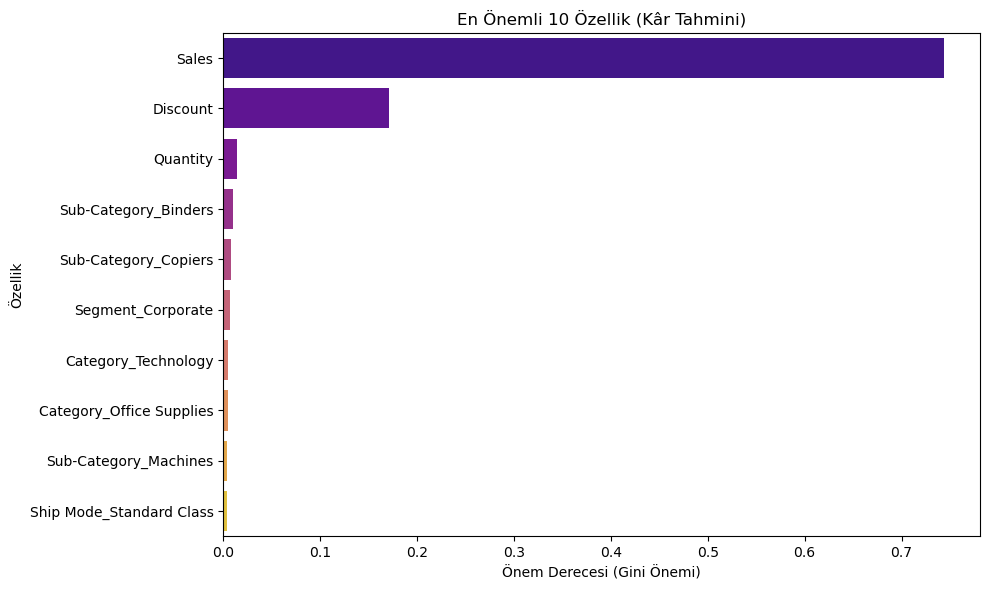

In [205]:
# Özellik Önem Derecesini Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='plasma')
plt.title('En Önemli 10 Özellik (Kâr Tahmini)')
plt.xlabel('Önem Derecesi (Gini Önemi)')
plt.ylabel('Özellik')
plt.tight_layout()
plt.savefig('ml_feature_importance.png')
print("Grafik Kaydedildi: ml_feature_importance.png")

print("\n--- Kâr Tahmininde En Önemli 10 Özellik ---")
print(top_10_features.to_markdown(numalign='left', stralign='left'))